# Setup

In [1]:
from IPython.display import display
from PIL import Image, ImageDraw
import numpy as np
import pickle as pkl
import matplotlib.path as mpltpath
import matplotlib.pyplot as plt

# Load data

In [2]:
n_sections = 2
signal = {}
bg = {}
ci = {}
depth = {}
pv = {}

In [3]:
# Signal
with open('G:\\Shared drives\\as_share\\HCR\\HCR 3.11\\S5\\S5_data_ndnf_sst_vip.pkl', 'rb') as f:
    signal[1] = pkl.load(f)
with open('G:\\Shared drives\\as_share\\HCR\\HCR 3.12\\S5\\S5_data_ndnf_sst_vip.pkl', 'rb') as f:
    signal[2] = pkl.load(f)



In [4]:
# Background
with open('G:\\Shared drives\\as_share\\HCR\\HCR 3.11\\S5\\S5_background_ndnf_sst_vip.pkl', 'rb') as f:
    bg[1] = pkl.load(f)
with open('G:\\Shared drives\\as_share\\HCR\\HCR 3.12\\S5\\S5_background_ndnf_sst_vip.pkl', 'rb') as f:
    bg[2] = pkl.load(f)


In [14]:
# 95% confidence interval from background
# with open('F:/HCR/HCR_10.17/S1_confidence_intervals_ndnf_sst_vip.pkl', 'rb') as f:
#     ci[1] = pkl.load(f)
# with open('F:/HCR/HCR_10.17/S2_confidence_intervals_ndnf_sst_vip.pkl', 'rb') as f:
#     ci[2] = pkl.load(f)

In [73]:
# P-value from bootstrapping background
# Binarized images

with open('G:\\Shared drives\\as_share\HCR\\HCR 3.11\\S5\\S5_pvals_lipo_excl_bin.pkl', 'rb') as f:
    pv[1] = pkl.load(f)
with open('G:\\Shared drives\\as_share\HCR\\HCR 3.12\\S5\\S5_pvals_lipo_excl_bin.pkl', 'rb') as f:
    pv[2] = pkl.load(f)

In [66]:
# P-value from bootstrapping background
# Raw images, lipofuscin excluded

with open('G:\\Shared drives\\as_share\HCR\\HCR 3.11\\S5\\S5_pvals_lipo_excl.pkl', 'rb') as f:
    pv[1] = pkl.load(f)
with open('G:\\Shared drives\\as_share\HCR\\HCR 3.12\\S5\\S5_pvals_lipo_excl.pkl', 'rb') as f:
    pv[2] = pkl.load(f)

In [55]:
# Depths
with open('G:\\Shared drives\\as_share\HCR\\HCR 3.11\\S5\\S5_depths.pkl', 'rb') as f:
    depth[1] = pkl.load(f)
with open('G:\\Shared drives\\as_share\HCR\\HCR 3.12\\S5\\S5_depths.pkl', 'rb') as f:
    depth[2] = pkl.load(f)


In [ ]:
colors = ['r', 'r', 'r']

In [64]:
colors = ['r', 'b', 'limegreen', 'k']

In [53]:
colors = ['k', 'k', 'k']

In [50]:
plt.close('all')

# Plot signal intensity vs depth

In [54]:
%matplotlib qt

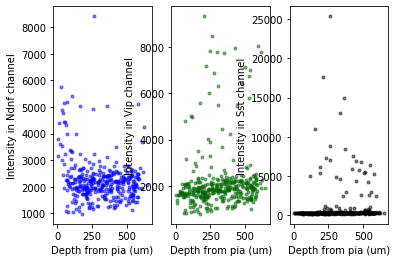

In [19]:
# Plot intensity vs depth for all channels
fig, ax = plt.subplots(nrows = 1, ncols = 3)


for section in range(n_sections):
    
    sig = signal[section + 1]
    n = sig['Ndnf']
    v = sig['Vip']
    s = sig['Sst']
    
    d = depth[section + 1]
    
    ax[0].scatter(d, n, color = colors[1], alpha = 0.5, marker = '.')
    ax[0].set_xlabel('Depth from pia (um)')
    ax[0].set_ylabel('Intensity in Ndnf channel')
    #ax[0].set_title('Max intensity = {0}'.format(int(np.max(n))))

    ax[1].scatter(d, v, color = colors[2], alpha = 0.5, marker = '.')
    ax[1].set_xlabel('Depth from pia (um)')
    ax[1].set_ylabel('Intensity in Vip channel')
    #ax[1].set_title('Max intensity = {0}'.format(int(np.max(avg_intensity_vip))))

    ax[2].scatter(d, s, color = colors[3], alpha = 0.5, marker = '.')
    ax[2].set_xlabel('Depth from pia (um)')
    ax[2].set_ylabel('Intensity in Sst channel')
    #ax[2].set_title('Max intensity = {0}'.format(int(np.max(avg_intensity_sst))))

# Plot signal vs depth with confidence intervals from background

## Confidence interval from bootstrapping background (95th percentile)

In [207]:
# Plot intensity vs depth for all channels
fig, ax = plt.subplots(nrows = 1, ncols = 3)


for section in range(2):
    
    sig = signal[section + 1]
    n = sig['Ndnf']
    v = sig['Vip']
    s = sig['Sst']
    
    b = bg[section + 1]
    bn = b['Ndnf']
    bv = b['Vip']
    bs = b['Sst']
    
    c = ci[section + 1]
    cn = c['Ndnf']
    cv = c['Vip']
    cs = c['Sst']
    
    d = depth[section + 1]
    
    npos = n - bn > cn
    vpos = v - bv > cv
    spos = s - bs > cs
    
    ax[0].scatter(d, n, color = colors[section], alpha = 0.3, marker = 'o')
    ax[0].scatter(d[npos], n[npos], color = 'k', marker = '.')
    ax[0].set_xlabel('Depth from pia (um)')
    ax[0].set_ylabel('Intensity in Ndnf channel (black => p < 0.05)')

    ax[1].scatter(d, v, color = colors[section], alpha = 0.3, marker = 'o')
    ax[1].scatter(d[vpos], v[vpos], color = 'k', marker = '.')
    ax[1].set_xlabel('Depth from pia (um)')
    ax[1].set_ylabel('Intensity in Vip channel (black => p < 0.05)')

    ax[2].scatter(d, s, color = colors[section], alpha = 0.3, marker = 'o')
    ax[2].scatter(d[spos], s[spos], color = 'k', marker = '.')
    ax[2].set_xlabel('Depth from pia (um)')
    ax[2].set_ylabel('Intensity in Sst channel (black => p < 0.05)')

## P value from bootstrapping background

In [15]:
%matplotlib qt

In [74]:
# Plot intensity vs depth for all channels
fig, ax = plt.subplots(nrows = 1, ncols = 3)



for section in range(2):
    
    sig = signal[section + 1]
#     n = sig['Ndnf_lipo_excl_bin']
#     v = sig['Vip_lipo_excl_bin']
#     s = sig['Sst_lipo_excl_bin']

    n = sig['Ndnf_lipo_excl']
    v = sig['Vip_lipo_excl']
    s = sig['Sst_lipo_excl']
    
    b = bg[section + 1]
    bn = b['Ndnf_bin']
    bv = b['Vip_bin']
    bs = b['Sst_bin']

#     bn = b['Ndnf']
#     bs = b['Sst']
#     bv = b['Vip']
    
    p = pv[section + 1]
    pv_ndnf = p['Ndnf']
    pv_vip = p['Vip']
    pv_sst = p['Sst']
    
    d = depth[section + 1]
    
    npos = pv_ndnf < 0.05
    vpos = pv_vip < 0.05
    spos = pv_sst < 0.05

#     npos = n - bn > 150
#     vpos = v - bv > 400
#     spos = s - bs > 100


######### Ndnf

    ax[0].scatter(d, n - bn, color = 'k', 
#                   alpha = 0.1, 
                  marker = 'o')
    ax[0].scatter(d[npos], n[npos] - bn[npos], color = colors[0], marker = 'o')

    
    
    ax[0].set_xlabel('Depth from pia (um)', fontsize = 25)
#     ax[0].set_ylabel('Intensity in Ndnf channel (bold => p < 0.05)')

    ax[0].set_ylabel('Signal in cell - background in raw images', fontsize = 25)
#     ax[0].set_yscale('log')
#     ax[0].set_ylim([np.min(n[n - bn > 0] - bn[n - bn > 0]), np.max(n - bn)])
    ax[0].xaxis.set_tick_params(which = 'both', labelsize = 20)
    ax[0].yaxis.set_tick_params(which = 'both', labelsize = 20)

    
########### Vip


    ax[1].scatter(d, v - bv, color = 'k', 
#                   alpha = 0.1, 
                  marker = 'o')
    ax[1].scatter(d[vpos], v[vpos] - bv[vpos], color = colors[1], marker = 'o')


    ax[1].set_xlabel('Depth from pia (um)', fontsize = 25)
#     ax[1].set_ylabel('Intensity in Vip channel (bold => p < 0.05)')
#     ax[1].set_yscale('log')
#     ax[1].set_ylim([np.min(v[v - bv > 0] - bv[v - bv > 0]), np.max(v - bv)])
    ax[1].xaxis.set_tick_params(which = 'both', labelsize = 20)
    ax[1].yaxis.set_tick_params(which = 'both', labelsize = 20)


# Sst


    ax[2].scatter(d, s - bs, color = 'k', 
#                   alpha = 0.02, 
                  marker = 'o')
    ax[2].scatter(d[spos], s[spos] - bs[spos], color = colors[2], marker = 'o')

    
    ax[2].set_xlabel('Depth from pia (um)', fontsize = 25)
#     ax[2].set_ylabel('Intensity in Sst channel (bold => p < 0.05)')
#     ax[2].set_yscale('log')
#     ax[2].set_ylim([np.min(s[s - bs > 0] - bs[s - bs > 0]), np.max(s - bs)])
    ax[2].xaxis.set_tick_params(which = 'both', labelsize = 20)
    ax[2].yaxis.set_tick_params(which = 'both', labelsize = 20)


In [61]:
plt.close('all')

## Confidence interval = 2*std(background)

In [109]:
# Plot intensity vs depth for all channels
fig, ax = plt.subplots(nrows = 2, ncols = 3)


for section in range(2):
    
    sig = signal[section + 1]
    n = sig['Ndnf']
    v = sig['Vip']
    s = sig['Sst']
    
    b = bg[section + 1]
    bn = b['Ndnf']
    bv = b['Vip']
    bs = b['Sst']
    
    d = depth[section + 1]
    
    section = section
    
    ax[section, 0].scatter(d, n, color = colors[section], alpha = 0.5, marker = '.')
    [x1, x2] = ax[section, 0].get_xlim()
    ax[section, 0].plot(np.linspace(x1, x2, 10), np.ones(10)*(np.mean(bn) + 2*np.std(bn)), linestyle = '--', color = 'k')
    ax[section, 0].plot(np.linspace(x1, x2, 10), np.ones(10)*(np.mean(bn) - 2*np.std(bn)), linestyle = '--', color = 'k')
    
    ax[section, 0].set_xlabel('Depth from pia (um)')
    ax[section, 0].set_ylabel('Intensity in Ndnf channel')
    #ax[0].set_title('Max intensity = {0}'.format(int(np.max(n))))

    ax[section, 1].scatter(d, v, color = colors[section], alpha = 0.5, marker = '.')
    ax[section, 1].plot(np.linspace(x1, x2, 10), np.ones(10)*(np.mean(bv) + 2*np.std(bv)), linestyle = '--', color = 'k')
    ax[section, 1].plot(np.linspace(x1, x2, 10), np.ones(10)*(np.mean(bv) - 2*np.std(bv)), linestyle = '--', color = 'k')
    ax[section, 1].set_xlabel('Depth from pia (um)')
    ax[section, 1].set_ylabel('Intensity in Vip channel')
    #ax[1].set_title('Max intensity = {0}'.format(int(np.max(avg_intensity_vip))))

    ax[section, 2].scatter(d, s, color = colors[section], alpha = 0.5, marker = '.')
    ax[section ,2].plot(np.linspace(x1, x2, 10), np.ones(10)*(np.mean(bs) + 2*np.std(bs)), linestyle = '--', color = 'k')
    ax[section, 2].plot(np.linspace(x1, x2, 10), np.ones(10)*(np.mean(bs) - 2*np.std(bs)), linestyle = '--', color = 'k')
    ax[section, 2].set_xlabel('Depth from pia (um)')
    ax[section, 2].set_ylabel('Intensity in Sst channel')
    #ax[2].set_title('Max intensity = {0}'.format(int(np.max(avg_intensity_sst))))

# Plot signal vs background

In [103]:
# Plot intensity vs depth for all channels
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (20, 10))
# colors = ['r', 'b', 'g']

for section in range(n_sections):
    
    sig = signal[section + 1]
    n = sig['Ndnf']
    v = sig['Vip']
    s = sig['Sst']
    
    b = bg[section + 1]
    n1 = b['Ndnf']
    v1 = b['Vip']
    s1 = b['Sst']
    
    ax[0].scatter(n, n1, color = colors[section], alpha = 0.5, marker = '.')
    ax[0].set_ylabel('Local background in Ndnf channel')
    ax[0].set_xlabel('Intensity in Ndnf channel')

    ax[1].scatter(v, v1, color = colors[section], alpha = 0.5, marker = '.')
    ax[1].set_ylabel('Local background in Vip channel')
    ax[1].set_xlabel('Intensity in Vip channel')
    
    ax[2].scatter(s, s1, color = colors[section], alpha = 0.5, marker = '.')
    ax[2].set_ylabel('Local background in Sst channel')
    ax[2].set_xlabel('Intensity in Sst channel')

In [48]:
plt.close('all')

# Plot true signal (raw - bg) vs bg

In [122]:
# Plot intensity vs depth for all channels
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (20, 10))
#colors = ['r', 'b', 'g']

for section in range(n_sections):
    
    sig = signal[section + 1]
    n = sig['Ndnf']
    v = sig['Vip']
    s = sig['Sst']
    
    b = bg[section + 1]
    n1 = b['Ndnf']
    v1 = b['Vip']
    s1 = b['Sst']
    
    ax[0].scatter(n1, n - n1, color = colors[section], alpha = 0.5, marker = '.')
    ax[0].set_ylabel('Signal - local background in Ndnf channel')
    ax[0].set_xlabel('Local background in Ndnf channel')

    ax[1].scatter(v1, v - v1, color = colors[section], alpha = 0.5, marker = '.')
    ax[1].set_ylabel('Signal - local background in Vip channel')
    ax[1].set_xlabel('Local background in Vip channel')
    
    ax[2].scatter(s1, s - s1, color = colors[section], alpha = 0.5, marker = '.')
    ax[2].set_ylabel('Signal - local background in Sst channel')
    ax[2].set_xlabel('Local background in Sst channel')

# Plot signal - background vs p value

In [209]:
# Plot intensity vs depth for all channels
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (20, 10))
#colors = ['r', 'b', 'g']

for section in range(2):
    
    sig = signal[section + 1]
    n = sig['Ndnf']
    v = sig['Vip']
    s = sig['Sst']
    
    b = bg[section + 1]
    n1 = b['Ndnf']
    v1 = b['Vip']
    s1 = b['Sst']
    
    p = pv[section + 1]
    pv_ndnf = p['Ndnf']
    pv_vip = p['Vip']
    pv_sst = p['Sst']
    
    ax[0].scatter(pv_ndnf, n - n1, color = colors[section], alpha = 0.5, marker = '.')
    ax[0].set_ylabel('Signal - local background in Ndnf channel')
    ax[0].set_xlabel('p value of signal in Ndnf channel')

    ax[1].scatter(pv_vip, v - v1, color = colors[section], alpha = 0.5, marker = '.')
    ax[1].set_ylabel('Signal - local background in Vip channel')
    ax[1].set_xlabel('p value of signal in Vip channel')
    
    ax[2].scatter(pv_sst, s - s1, color = colors[section], alpha = 0.5, marker = '.')
    ax[2].set_ylabel('Signal - local background in Sst channel')
    ax[2].set_xlabel('p value of signal in Sst channel')

# Plot signal - background vs depth

In [104]:
# Plot intensity vs depth for all channels
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (20, 10))
# colors = ['r', 'b', 'g']

for section in range(n_sections):
    
    sig = signal[section + 1]
    b = bg[section + 1]
    n = sig['Ndnf'] - b['Ndnf']
    v = sig['Vip'] - b['Vip']
    s = sig['Sst'] - b['Sst']
    
    d = depth[section + 1]
    
    ax[0].scatter(d, n, color = colors[section], alpha = 0.5, marker = '.')
    ax[0].set_xlabel('Depth from pia (um)')
    ax[0].set_ylabel('Signal - background in Ndnf channel')
    #ax[0].set_title('Max intensity = {0}'.format(int(np.max(n))))

    ax[1].scatter(d, v, color = colors[section], alpha = 0.5, marker = '.')
    ax[1].set_xlabel('Depth from pia (um)')
    ax[1].set_ylabel('Signal - background in Vip channel')
    #ax[1].set_title('Max intensity = {0}'.format(int(np.max(avg_intensity_vip))))

    ax[2].scatter(d, s, color = colors[section], alpha = 0.5, marker = '.')
    ax[2].set_xlabel('Depth from pia (um)')
    ax[2].set_ylabel('Signal - background in Sst channel')
    #ax[2].set_title('Max intensity = {0}'.format(int(np.max(avg_intensity_sst))))

# Plot background vs depth

In [105]:
# Plot intensity vs depth for all channels
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (20, 10))
# colors = ['r', 'b', 'g']

for section in range(n_sections):
    
    b = bg[section + 1]
    n = b['Ndnf']
    v = b['Vip']
    s = b['Sst']
    
    d = depth[section + 1]
    
    ax[0].scatter(d, n, color = colors[section], alpha = 0.5, marker = '.')
    ax[0].set_xlabel('Depth from pia (um)')
    ax[0].set_ylabel('Background in Ndnf channel')
    #ax[0].set_title('Max intensity = {0}'.format(int(np.max(n))))

    ax[1].scatter(d, v, color = colors[section], alpha = 0.5, marker = '.')
    ax[1].set_xlabel('Depth from pia (um)')
    ax[1].set_ylabel('Background in Vip channel')
    #ax[1].set_title('Max intensity = {0}'.format(int(np.max(avg_intensity_vip))))

    ax[2].scatter(d, s, color = colors[section], alpha = 0.5, marker = '.')
    ax[2].set_xlabel('Depth from pia (um)')
    ax[2].set_ylabel('Background in Sst channel')
    #ax[2].set_title('Max intensity = {0}'.format(int(np.max(avg_intensity_sst))))

# Plot gene1 vs gene2

In [27]:
# Plot intensity vs depth for all channels
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (20, 10))
colors = ['r', 'b', 'g']

for section in range(n_sections):
    
    sig = signal[section + 1]
    n = sig['Ndnf']
    v = sig['Vip']
    s = sig['Sst']
    
    d = depth[section + 1]
    
    ax[0].scatter(v, n, color = colors[section], alpha = 0.5)
    ax[0].set_xlabel('Intensity in Vip channel')
    ax[0].set_ylabel('Intensity in Ndnf channel')
    #ax[0].set_title('Max intensity = {0}'.format(int(np.max(n))))

    ax[1].scatter(v, s, color = colors[section], alpha = 0.5)
    ax[1].set_xlabel('Intensity in Vip channel')
    ax[1].set_ylabel('Intensity in Sst channel')
    #ax[1].set_title('Max intensity = {0}'.format(int(np.max(avg_intensity_vip))))

    ax[2].scatter(s, n, color = colors[section], alpha = 0.5)
    ax[2].set_xlabel('Intensity in Sst channel')
    ax[2].set_ylabel('Intensity in Ndnf channel')
    #ax[2].set_title('Max intensity = {0}'.format(int(np.max(avg_intensity_sst))))

# Classify cells

In [68]:
def moving_average(a, n=3) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret / n

In [75]:
fig, ax = plt.subplots(nrows = 1, ncols = 2)

for section in range(n_sections):
    
    sig = signal[section + 1]
    n = sig['Ndnf_lipo_excl']
    v = sig['Vip_lipo_excl']
    s = sig['Sst_lipo_excl']
    
    b = bg[section + 1]
    n1 = b['Ndnf']
    v1 = b['Vip']
    s1 = b['Sst']
    
    d = depth[section + 1]
        
    #npos = n > np.mean(n1) + 2*np.std(n1)
#     npos = n > 1000
#     vpos = v > np.mean(v1) + 2*np.std(v1)
#     spos = s > np.mean(s1) + 2*np.std(s1)

    p = pv[section + 1]
    pv_ndnf = p['Ndnf']
    pv_vip = p['Vip']
    pv_sst = p['Sst']
    
    d = depth[section + 1]
    
    npos = pv_ndnf < 0.05
    vpos = pv_vip < 0.05
    spos = pv_sst < 0.05
    
#     row = int(section/2)
    row = np.mod(section, 2)
    col = np.mod(section, 2)
    
    order = np.argsort(d)
    
    ax[row].plot(d[order], moving_average(npos[order], n = 20)*10, color = 'gold', label = 'Ndnf')
    ax[row].plot(d[order], moving_average(vpos[order], n = 20)*10, color = 'g', label = 'Vip')
    ax[row].plot(d[order], moving_average(spos[order], n = 20)*10, color = 'r', label = 'Sst')
    
    plt.legend()
    
    #ax[row].set_title('Section {0}'.format(section + 1))
    if row == 1:
        ax[row].set_xlabel('Depth from pia (um)')
    
    if col == 0:
        ax[row].set_ylabel('# of cells positive for gene')

No handles with labels found to put in legend.


In [86]:
print('Number of Ndnf+ cells: {0}'.format(np.sum(npos)))
print('Number of Vip+ cells: {0}'.format(np.sum(vpos)))
print('Number of Sst+ cells: {0}'.format(np.sum(spos)))

print('')
print('Number of Ndnf+ Vip+ cells: {0}'.format(np.sum(np.logical_and(npos, vpos))))
print('Number of Ndnf+ Sst+ cells: {0}'.format(np.sum(np.logical_and(npos, spos))))
print('Number of Sst+ Vip+ cells: {0}'.format(np.sum(np.logical_and(spos, vpos))))

Number of Ndnf+ cells: 81
Number of Vip+ cells: 51
Number of Sst+ cells: 13

Number of Ndnf+ Vip+ cells: 7
Number of Ndnf+ Sst+ cells: 0
Number of Sst+ Vip+ cells: 2


In [87]:
section = 0
p = pv[section + 1]
pv_ndnf = p['Ndnf']
pv_vip = p['Vip']
pv_sst = p['Sst']

d = depth[section + 1]

npos = pv_ndnf < 0.05
vpos = pv_vip < 0.05
spos = pv_sst < 0.05

In [88]:
print('Number of Ndnf+ cells: {0}'.format(np.sum(npos)))
print('Number of Vip+ cells: {0}'.format(np.sum(vpos)))
print('Number of Sst+ cells: {0}'.format(np.sum(spos)))

print('')
print('Number of Ndnf+ Vip+ cells: {0}'.format(np.sum(np.logical_and(npos, vpos))))
print('Number of Ndnf+ Sst+ cells: {0}'.format(np.sum(np.logical_and(npos, spos))))
print('Number of Sst+ Vip+ cells: {0}'.format(np.sum(np.logical_and(spos, vpos))))

Number of Ndnf+ cells: 73
Number of Vip+ cells: 60
Number of Sst+ cells: 33

Number of Ndnf+ Vip+ cells: 21
Number of Ndnf+ Sst+ cells: 9
Number of Sst+ Vip+ cells: 14


In [76]:
npos

array([ True,  True,  True,  True,  True,  True,  True, False, False,
       False, False, False, False,  True,  True,  True,  True, False,
        True,  True, False, False, False, False, False,  True, False,
        True, False,  True, False, False,  True, False, False, False,
       False, False, False,  True,  True, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False,  True, False, False,
       False, False, False,  True,  True,  True, False, False,  True,
        True,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False,  True, False,
       False, False, False, False, False, False, False, False, False,
        True,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False,